In [1]:
#!cp /usr/local/share/jupyterhub/linregress_3D.py .
#이 파일은 홈 디렉터리에 복사되어 있습니다. 

In [3]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import gsw
from mpl_toolkits.basemap import Basemap
from scipy import stats
from linregress_3D import lag_linregress_3D
%config InlineBackend.figure_formats = ['svg']

### Learn to open multiple netcdf files and to use simple xarray commands (It will take some time)
### 여러개의 netcdf 파일들을 간단한 명령으로 여는 법 (시간이 좀 걸립니다. )

NetCDF는 지구과학에서 사용되는 크기가 크고 다양한 단위의 차원을 가진 행렬을 쉽게 교환하기 위한 표준 포멧임. 

In [4]:
ds=xr.open_mfdataset('./Data/ersst4/ersst.v4.*')

In [5]:
ds

,Array,Chunk
Bytes,127.78 MB,64.08 kB
Shape,"(1994, 1, 89, 180)","(1, 1, 89, 180)"
Count,5982 Tasks,1994 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,127.78 MB,64.08 kB
Shape,"(1994, 1, 89, 180)","(1, 1, 89, 180)"
Count,5982 Tasks,1994 Chunks
Type,float32,numpy.ndarray


In [6]:
testsst=ds.sst.sel(lev=0,lat=0.,lon=180.)
testsst

,Array,Chunk
Bytes,7.98 kB,4 B
Shape,"(1994,)","(1,)"
Count,7976 Tasks,1994 Chunks
Type,float32,numpy.ndarray


In [7]:
testsst2=ds.sst.isel(lev=0,lat=45,lon=90)
testsst2

,Array,Chunk
Bytes,7.98 kB,4 B
Shape,"(1994,)","(1,)"
Count,7976 Tasks,1994 Chunks
Type,float32,numpy.ndarray


In [8]:
testsst3=ds.sst.isel(lev=0,lat=45,lon=90,drop=True)
testsst3

,Array,Chunk
Bytes,7.98 kB,4 B
Shape,"(1994,)","(1,)"
Count,7976 Tasks,1994 Chunks
Type,float32,numpy.ndarray


In [9]:
testfill=ds.sst.sel(lev=0,drop=True)
testfill

,Array,Chunk
Bytes,127.78 MB,64.08 kB
Shape,"(1994, 89, 180)","(1, 89, 180)"
Count,7976 Tasks,1994 Chunks
Type,float32,numpy.ndarray


# 과제: SST를 평균내서 원통도법으로 플롯하시오. 

이 과제는 교수님이 추후 제시한 예시 코드가 있으나 제시하지 않고 작성자의 코드만 제시함. 

In [10]:
LongTermMean = ds.sst.sel(lev=0,drop=True).mean(axis=0)
np.shape(LongTermMean)
type(LongTermMean)
LongTermMean

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
dask.array<mean_agg-aggregate, shape=(89, 180), dtype=float32, chunksize=(89, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [11]:
LongTermMean.lon.min

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 

/opt/datascience/lib64/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


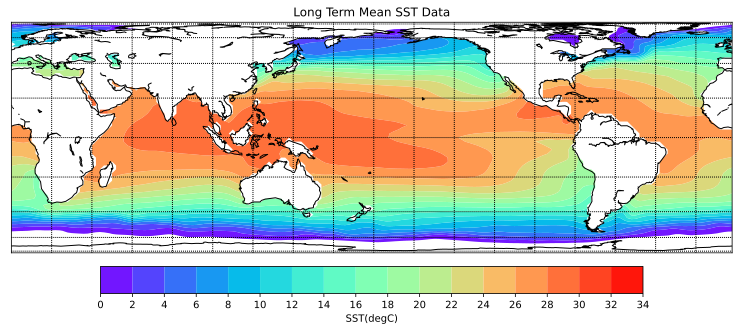

In [12]:
from matplotlib import cm
leningrad, stlingrad=np.meshgrid(LongTermMean.lon,LongTermMean.lat)
### from matplotlib import cm
fighw=plt.figure(figsize=(15,5))
m=Basemap(projection='cea',llcrnrlon=0., llcrnrlat=-88., urcrnrlon=358., urcrnrlat=88.)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.)) #위도선
m.drawmeridians(np.arange(-180.,181.,20.)) #경도선
leningrad, stlingrad=m(leningrad, stlingrad)
m=plt.contourf(leningrad,stlingrad,LongTermMean,np.arange(0,36,2),cmap=cm.rainbow)
cax=fighw.add_axes()
plt.colorbar(fraction=0.1, pad=0.05, orientation='horizontal',ticks=np.arange(0,36,2),label='SST(degC)')
plt.title('Long Term Mean SST Data')
plt.show()

# 지구 온난화 시계열 자료와 선형 보간

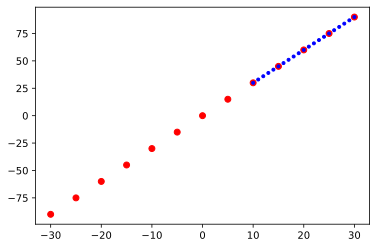

In [14]:
#Get global warming time series and learn linear interpolation

#Simple linear interpolation

xtest=np.arange(-30,31,5)#old x
ytest=xtest * 3
newxtest=np.arange(10,31,1)
newytest=np.interp(newxtest,xtest,ytest)

plt.plot(xtest,ytest,'ro')
plt.plot(newxtest,newytest,'b.')

In [13]:
#!wget https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv

--2020-08-05 15:05:01--  https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv
Resolving www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.177, 205.167.25.178, 205.167.25.171, ...
Connecting to www.ncdc.noaa.gov (www.ncdc.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1577 (1.5K) [text/csv]
Saving to: ‘1880-2016.csv’

1880-2016.csv       100%[===================>]   1.54K  --.-KB/s    in 0s      

2020-08-05 15:05:02 (59.0 MB/s) - ‘1880-2016.csv’ saved [1577/1577]



In [15]:
!cat 1880-2016.csv

Global Land and Ocean Temperature Anomalies, January-December
Units: Degrees Celsius
Base Period: 1901-2000
Missing: -999
Year,Value
1880,-0.12
1881,-0.08
1882,-0.09
1883,-0.18
1884,-0.26
1885,-0.25
1886,-0.24
1887,-0.28
1888,-0.13
1889,-0.08
1890,-0.34
1891,-0.25
1892,-0.30
1893,-0.32
1894,-0.30
1895,-0.24
1896,-0.09
1897,-0.09
1898,-0.27
1899,-0.15
1900,-0.07
1901,-0.15
1902,-0.25
1903,-0.37
1904,-0.45
1905,-0.28
1906,-0.21
1907,-0.38
1908,-0.43
1909,-0.45
1910,-0.40
1911,-0.44
1912,-0.34
1913,-0.32
1914,-0.14
1915,-0.09
1916,-0.32
1917,-0.39
1918,-0.30
1919,-0.25
1920,-0.23
1921,-0.16
1922,-0.24
1923,-0.25
1924,-0.24
1925,-0.18
1926,-0.07
1927,-0.17
1928,-0.18
1929,-0.33
1930,-0.11
1931,-0.06
1932,-0.13
1933,-0.26
1934,-0.11
1935,-0.16
1936,-0.12
1937,-0.01
1938,-0.02
1939,0.01
1940,0.16
1941,0.27
1942,0.11
1943,0.10
1944,0.28
1945,0.18
1946,-0.01
1947,-0.04
1948,-0.05
1949,-0.07
1950,-0.15
1951,0.00
1952,0.04
1953,0.13
1954,-0.10
1955,-0.13
1956,-0.18
1957,0.07
1958,0.13
1959,0.08


In [17]:
#using pandas command read csv

df=pd.read_csv('1880-2016.csv', header=[4])
df

,Year,Value
0,1880,-0.12
1,1881,-0.08
2,1882,-0.09
3,1883,-0.18
4,1884,-0.26
...,...,...
132,2012,0.64
133,2013,0.68
134,2014,0.74
135,2015,0.93


In [18]:
df2=pd.read_csv('1880-2016.csv',skiprows=4,header=[0])
df2

,Year,Value
0,1880,-0.12
1,1881,-0.08
2,1882,-0.09
3,1883,-0.18
4,1884,-0.26
...,...,...
132,2012,0.64
133,2013,0.68
134,2014,0.74
135,2015,0.93


In [22]:
print(type(df))
GWdata=df.values #수정:deprecated 된 코드 재작성.  
print(type(GWdata))
GWdata[:,1]

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


array([-0.12, -0.08, -0.09, -0.18, -0.26, -0.25, -0.24, -0.28, -0.13,
       -0.08, -0.34, -0.25, -0.3 , -0.32, -0.3 , -0.24, -0.09, -0.09,
       -0.27, -0.15, -0.07, -0.15, -0.25, -0.37, -0.45, -0.28, -0.21,
       -0.38, -0.43, -0.45, -0.4 , -0.44, -0.34, -0.32, -0.14, -0.09,
       -0.32, -0.39, -0.3 , -0.25, -0.23, -0.16, -0.24, -0.25, -0.24,
       -0.18, -0.07, -0.17, -0.18, -0.33, -0.11, -0.06, -0.13, -0.26,
       -0.11, -0.16, -0.12, -0.01, -0.02,  0.01,  0.16,  0.27,  0.11,
        0.1 ,  0.28,  0.18, -0.01, -0.04, -0.05, -0.07, -0.15,  0.  ,
        0.04,  0.13, -0.1 , -0.13, -0.18,  0.07,  0.13,  0.08,  0.05,
        0.09,  0.1 ,  0.12, -0.14, -0.07, -0.01,  0.  , -0.03,  0.11,
        0.06, -0.07,  0.04,  0.19, -0.06,  0.01, -0.07,  0.21,  0.12,
        0.23,  0.28,  0.32,  0.19,  0.36,  0.17,  0.16,  0.24,  0.38,
        0.39,  0.3 ,  0.45,  0.39,  0.24,  0.28,  0.35,  0.47,  0.32,
        0.52,  0.65,  0.44,  0.43,  0.57,  0.63,  0.64,  0.59,  0.67,
        0.64,  0.62,

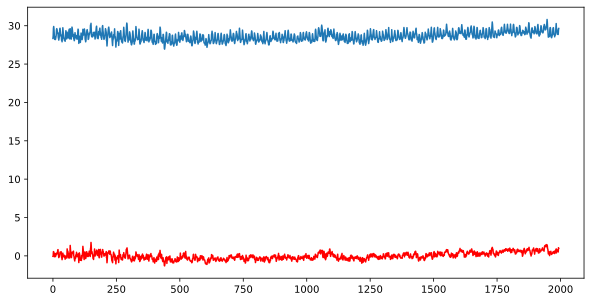

In [26]:
figS=plt.figure(figsize=(10,5))
sample=ds.sst.sel(lev=0,lat=0,lon=84.,drop=True)
plt.plot(sample)

sample_clm=sample.groupby("time.month").mean(dim='time')
sample=sample.groupby("time.month")-sample_clm
plt.plot(sample,'r')

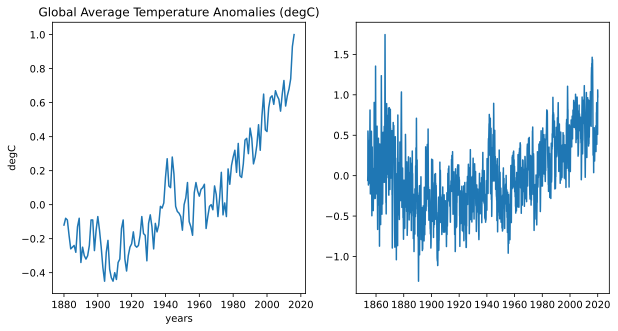

In [25]:
#Learn linear regression and perform GW curve fitting on a grid cell time series

figT=plt.figure(figsize=(10,5))
ax0=figT.add_subplot(121)
plt.plot(GWdata[:,0],GWdata[:,1])
plt.title('Global Average Temperature Anomalies (degC)')
plt.ylabel('degC')
plt.xlabel('years')

ax1=figT.add_subplot(122)
plt.plot(ds.sst.time,sample)
plt.show()

(1994,) (137,)
(1644,) (1994,)


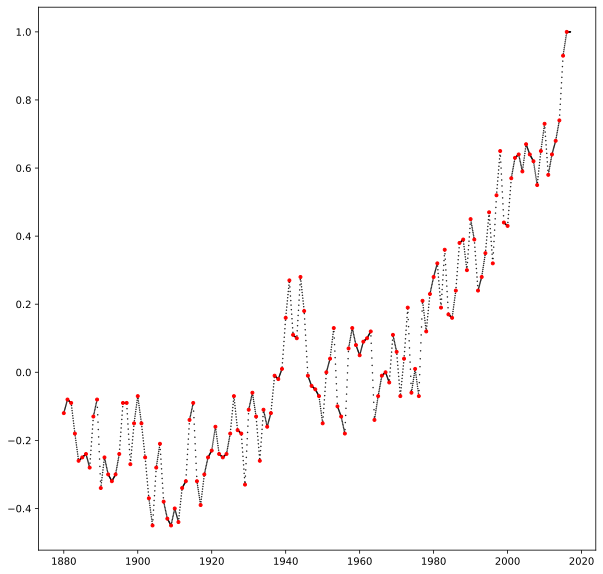

In [27]:
#sync tow data sets in time
print(np.shape(sample),np.shape(GWdata[:,1]))
newaxisforgw=np.linspace(1880,2017,(2017-1880)*12)
sample2=sample.sel(time=slice('1880-01-01','2016-12-01'))

gw=np.interp(newaxisforgw,GWdata[:,0],GWdata[:,1])
figX=plt.figure(figsize=(10,10))
plt.plot(newaxisforgw,gw,'k.',markersize=1)
plt.plot(GWdata[:,0],GWdata[:,1],'r.')

print(np.shape(gw),np.shape(sample))

In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gw, sample2)
sample2hat=slope*gw+intercept

Text(0, 0.5, 'sst at 35N and 174E (degC)')

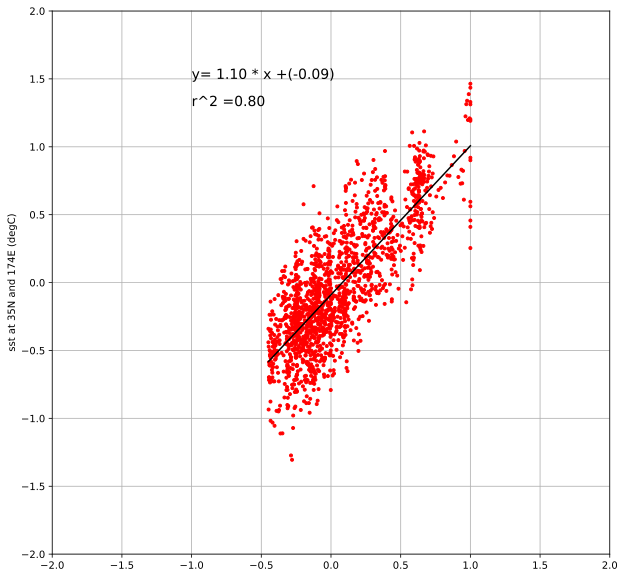

In [29]:
fig2=plt.figure(figsize=(10,10))
plt.plot(gw,sample2,'r.')
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.plot(gw,sample2hat,'k')
plt.grid(True)
Mystring = 'y= ' + '{:4.2f}'.format(slope) + " * x +" + "({:4.2f}".format(intercept)+")"
MyStr2="r^2 =" + '{:4.2f}'.format(r_value)
plt.text(-1.,1.5,Mystring,fontsize=14)
plt.text(-1.,1.3,MyStr2,fontsize=14)
plt.ylabel('sst at 35N and 174E (degC)')

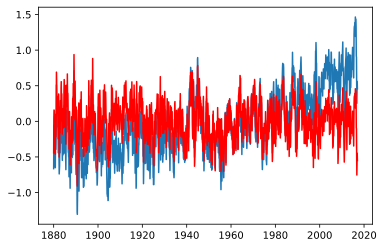

In [30]:
sample2nogw=sample2-sample2hat
plt.plot(newaxisforgw,sample2)
plt.plot(newaxisforgw,sample2nogw,'r')

In [1]:
(2016-1980)*12

432

In [2]:
#First, remove seasonal cycle
sstlong=ds.sst.sel(lev=0,drop=True)
sst=sstlong.sel(time=slice('1880-01-01','2016-12-01'))
sst_clm=sst.groupby("time.month").mean(dim='time')
sst=sst.groupby("time.month")-sst_clm
#Nomalize global warming time series
newgw=xr.DataArray(gw,dims='time',coords=[sst.time])
newgw1=newgw/np.std(newgw)
newgw1,sst=xr.align(newgw1,sst)
cov,cor,slope,intercept,pval,stderr=lag_linregress_3D(x=newgw1,y=sst)
np.shape(slope)

NameError: name 'ds' is not defined

In [27]:
#Exercise 02. Detect Global Warming Footprint in the precipitation data using only  the years 1980-2016

In [28]:
filename='/usr/local/share/jupyterhub/data/CMAP/precip.mon.mean.nc'

In [29]:
#Using the xarray command, open a netcdf file indicated above. then, check what is in the dataset by listing the metadata

In [30]:
precipds=xr.open_mfdataset(filename)

In [31]:
precipds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 483)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-03-01
Data variables:
    precip   (time, lat, lon) float32 dask.array<shape=(483, 72, 144), chunksize=(483, 72, 144)>
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1904
    history:        update 04/2019 V1904
    data_modified:  2019-04-15

In [32]:
precipLong=precipds.precip.sel(drop=True)
precip=precipLong.sel(time=slice('1980-01-01','2016-12-31'))
precipClm=precip.groupby("time.month").mean(dim='time')
precip=precip.groupby("time.month")-precipClm


#sstlong=ds.sst.sel(lev=0,drop=True)
#sst=sstlong.sel(time=slice('1880-01-01','2016-12-01'))
#sst_clm=sst.groupby("time.month").mean(dim='time')
#sst=sst.groupby("time.month")-sst_clm

/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/xarray/core/indexing.py:1201: PerformanceWarning: Slicing with an out-of-order index is generating 37 times more chunks
  return self.array[key]


In [33]:
print(newpc1.shape)
print(newgw1.shape)

NameError: name 'newpc1' is not defined

In [35]:
newaxisforpt=np.linspace(1980,2016,(2017-1980)*12)
gw2=np.interp(newaxisforpt,GWdata[:,0],GWdata[:,1])
newpc=xr.DataArray(gw2,dims='time',coords=[precip.time])
newpc1=newpc/np.std(newpc)
newpc1,precip=xr.align(newpc1,precip)
cov,cor,slope,intercepc,pval,stderr=lag_linregress_3D(x=newpc1,y=precip)

#newgw=xr.DataArray(gw,dims='time',coords=[sst.time])
#newgw1=newgw/np.std(newgw)
#newgw1,sst=xr.align(newgw1,sst)
#cov,cor,slope,intercept,pval,stderr=lag_linregress_3D(x=newgw1,y=sst)
#newgw

#cov,cor,slope,intercept,pval,stderr=lag_linregress_3D(precip.time, precip.lat, precip.lon)
print(slope)

/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/reductions.py:384: RuntimeWarning: divide by zero encountered in true_divide
  u = total / n
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/reductions.py:384: RuntimeWarning: invalid value encountered in true_divide
  u = total / n


<xarray.DataArray (lat: 72, lon: 144)>
dask.array<shape=(72, 144), dtype=float64, chunksize=(72, 144)>
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75


/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# HOMEWORK

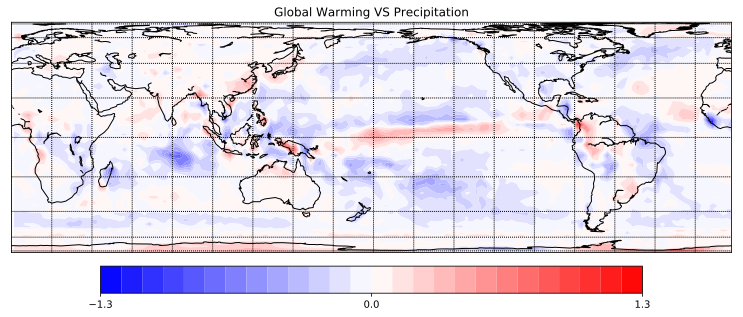

In [36]:
from matplotlib import cm
leningrad, stalingrad=np.meshgrid(slope.lon,slope.lat)
### from matplotlib import cm
fighw=plt.figure(figsize=(15,5))
m=Basemap(projection='cea',llcrnrlon=0., llcrnrlat=-88., urcrnrlon=358., urcrnrlat=88.)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.)) #위도선
m.drawmeridians(np.arange(-180.,181.,20.)) #경도선
leningrad, stlingrad=m(leningrad, stalingrad)
m=plt.contourf(leningrad,stlingrad,slope,np.arange(-1.3,1.4,0.1),cmap=cm.bwr)
cax=fighw.add_axes()
plt.colorbar(fraction=0.1, pad=0.05, orientation='horizontal',ticks=(-1.3,0.,1.3))
plt.title('Global Warming VS Precipitation')
plt.show()


In [ ]:
np.shape(sst_clm)

In [ ]:
newgw=xr.DataArray(gw,dims='time',coords=[sst.time])
newgw1=newgw/np.std(newgw)
newgw1,sst=xr.align(newgw1,sst)
cov,cor,slope,intercept,pval,stderr=lag_linregress_3D(x=newgw1,y=sst)
newgw

In [ ]:
newgw

In [ ]:
np.shape(gw)

In [ ]:
gw